In [45]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [46]:
dataframe = pd.read_csv("diabetes_data_upload.csv")
dataframe.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [47]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (520, 17)
Size of Diabetes dataset is  : 8840


In [48]:

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [49]:
dataframe.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


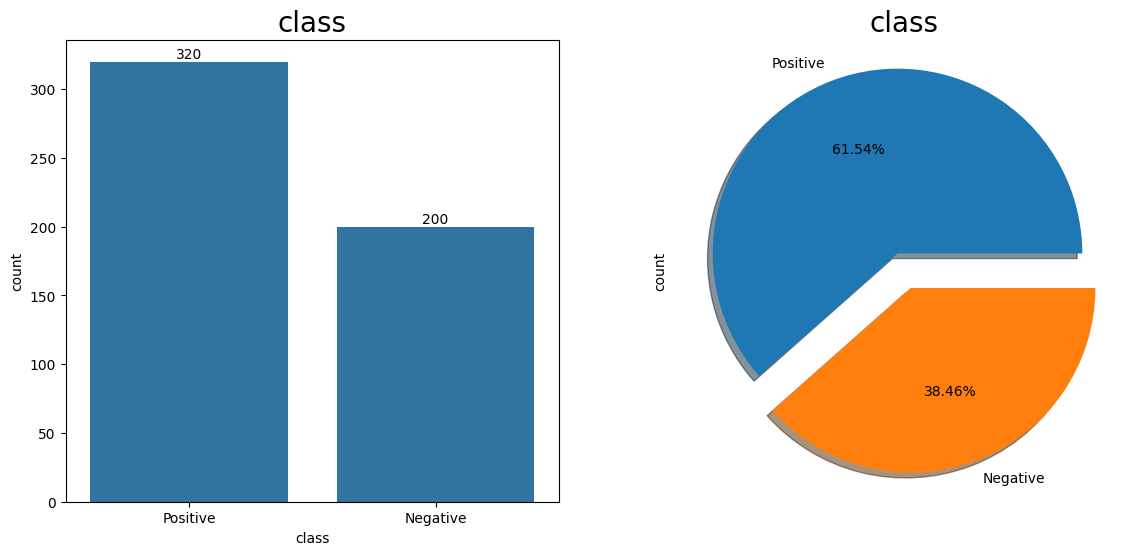

In [50]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='class', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("class", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['class'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "class", fontsize = 20);

In [51]:
dataframe.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [52]:
# Find missing values
missing_values = dataframe.isnull().sum()

# Display missing values
print("\nMissing values:")
print(missing_values)


Missing values:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [53]:
x = dataframe.drop(columns='class', axis=1)
y = dataframe['class']

Information Gain for each feature:
Polyuria: 0.36225097556392616
Polydipsia: 0.3590562033639636
Age: 0.2431546139695704
Gender: 0.16342004460055615
sudden weight loss: 0.14877241691930587
partial paresis: 0.14465281318099354
Polyphagia: 0.08784233692848964
Irritability: 0.07287283527150457
Alopecia: 0.0511631310882128
visual blurring: 0.0466060117411784
weakness: 0.04266632590587249
muscle stiffness: 0.01097343674666773
Genital thrush: 0.009045856850095957
Obesity: 0.0038511944671451026
delayed healing: 0.0015947281936917745
Itching: 0.00012920060399046474


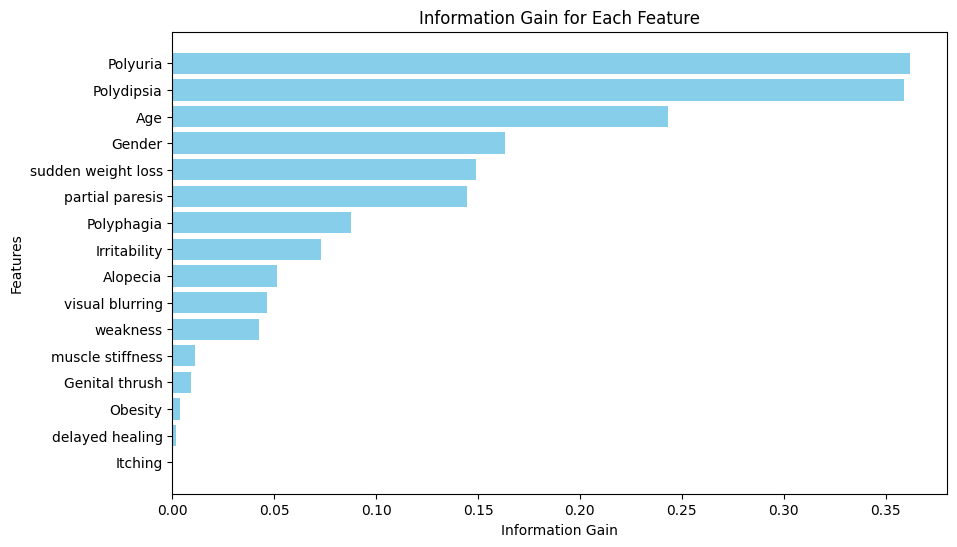

In [54]:
# Define the entropy function
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(elements))
        ]
    )
    return entropy_val


# Define the function to calculate information gain
def information_gain(data, feature, target_name="class"):
    total_entropy = entropy(data[target_name])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum(
        [(counts[i] / np.sum(counts)) * entropy(data.where(data[feature] == values[i]).dropna()[target_name])
         for i in range(len(values))]
    )
    information_gain_val = total_entropy - weighted_entropy
    return information_gain_val


# Calculate information gain for each feature
information_gain_values = {}
for feature in dataframe.columns:
    if feature != 'class':
        information_gain_values[feature] = information_gain(dataframe, feature)

# Sort features by information gain
sorted_information_gain = sorted(information_gain_values.items(), key=lambda x: x[1], reverse=True)

# Display the information gain for each feature
print("Information Gain for each feature:")
for feature, gain in sorted_information_gain:
    print(f"{feature}: {gain}")

# Plotting the information gain for each feature
features = [x[0] for x in sorted_information_gain]
gains = [x[1] for x in sorted_information_gain]

plt.figure(figsize=(10, 6))
plt.barh(features, gains, color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.title('Information Gain for Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest information gain on top
plt.show()

In [55]:
# Chi-Square Test
categorical_features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']
from scipy.stats import chi2_contingency
for feature in categorical_features:
    contingency_table = pd.crosstab(dataframe[feature], dataframe['class'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print()
# Create a DataFrame for the Chi-Square results
chi2_df = pd.DataFrame({'Feature': categorical_features, 'Chi-Square': chi2, 'P-value': p})

# # Plot the correlation matrix heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(chi2_df.pivot(index='Feature', columns='Feature', values='P-value'),
#             annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
# plt.title("Chi-Square Test P-values for Categorical Features")
# plt.show()


Chi-Square Test for Age:
Chi-Square Statistic: 145.7864
P-value: 0.0000

Chi-Square Test for Gender:
Chi-Square Statistic: 103.0369
P-value: 0.0000

Chi-Square Test for Polyuria:
Chi-Square Statistic: 227.8658
P-value: 0.0000

Chi-Square Test for Polydipsia:
Chi-Square Statistic: 216.1716
P-value: 0.0000

Chi-Square Test for sudden weight loss:
Chi-Square Statistic: 97.2963
P-value: 0.0000

Chi-Square Test for weakness:
Chi-Square Statistic: 29.7679
P-value: 0.0000

Chi-Square Test for Polyphagia:
Chi-Square Statistic: 59.5953
P-value: 0.0000

Chi-Square Test for Genital thrush:
Chi-Square Statistic: 5.7921
P-value: 0.0161

Chi-Square Test for visual blurring:
Chi-Square Statistic: 31.8085
P-value: 0.0000

Chi-Square Test for Itching:
Chi-Square Statistic: 0.0462
P-value: 0.8297

Chi-Square Test for Irritability:
Chi-Square Statistic: 45.2083
P-value: 0.0000

Chi-Square Test for delayed healing:
Chi-Square Statistic: 0.9621
P-value: 0.3267

Chi-Square Test for partial paresis:
Chi-Squa

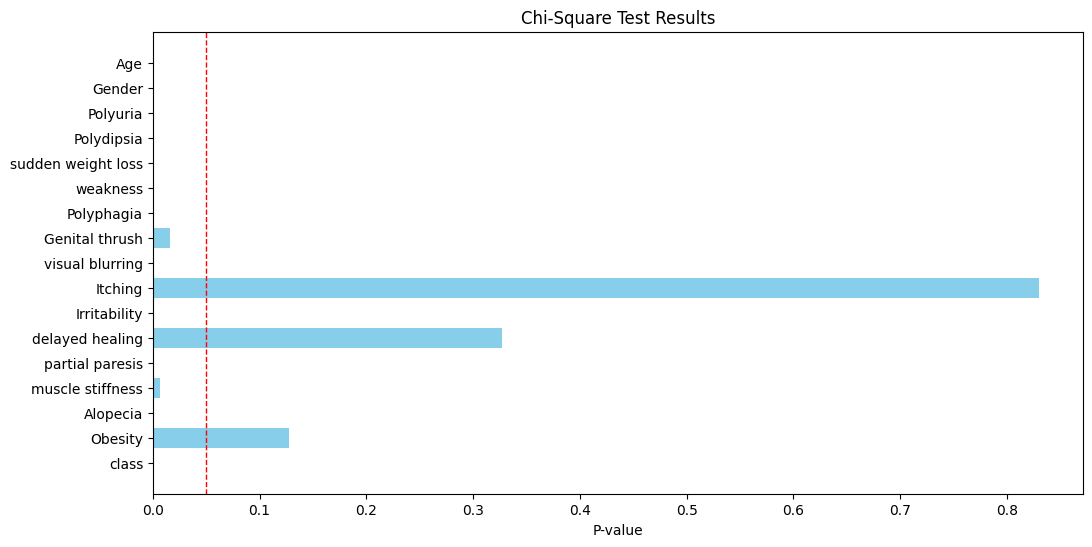

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define the categorical features
categorical_features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Perform the Chi-Square test for each feature
chi2_results = {'Feature': [], 'Chi-Square': [], 'P-value': []}
for feature in categorical_features:
    contingency_table = pd.crosstab(dataframe[feature], dataframe['class'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results['Feature'].append(feature)
    chi2_results['Chi-Square'].append(chi2)
    chi2_results['P-value'].append(p)

# Create a DataFrame for the Chi-Square results
chi2_df = pd.DataFrame(chi2_results)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(chi2_df['Feature'], chi2_df['P-value'], color='skyblue')
plt.xlabel('P-value')
plt.title('Chi-Square Test Results')
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=1)  # Adding a threshold line at p-value 0.05
plt.gca().invert_yaxis()  # Invert y-axis to have the highest p-value on top
plt.show()


In [57]:

data = dataframe.replace({'Yes': 1, 'No': 0})

# Convert 'Gender' into two new features: "Gender_Male" and "Gender_Female"
data['Gender_Male'] = np.where(data['Gender'] == 'Male', 1, 0)
data['Gender_Female'] = np.where(data['Gender'] == 'Female', 1, 0)

# Drop the original 'Gender' column
data.drop('Gender', axis=1, inplace=True)
data

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_Male,Gender_Female
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive,1,0
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive,1,0
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive,1,0
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive,1,0
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive,0,1
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive,0,1
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive,0,1
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative,0,1


In [58]:
df = data.drop(columns=["Genital thrush","Itching","delayed healing","muscle stiffness","Obesity"], axis=1)
df = df.replace({'Positive': 1, 'Negative': 0})

df

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia,class,Gender_Male,Gender_Female
0,40,0,1,0,1,0,0,0,0,1,1,1,0
1,58,0,0,0,1,0,1,0,1,1,1,1,0
2,41,1,0,0,1,1,0,0,0,1,1,1,0
3,45,0,0,1,1,1,0,0,0,0,1,1,0
4,60,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,0,1
516,48,1,1,1,1,1,0,1,1,0,1,0,1
517,58,1,1,1,1,1,1,0,1,0,1,0,1
518,32,0,0,0,1,0,1,0,0,1,0,0,1


In [59]:
x = data.replace({'Positive': 1, 'Negative': 0})
X = x.drop(columns='class',axis=1)
Y = x['class']

In [60]:
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.ensemble import RandomForestClassifier


# Standardize features (assuming x is your feature matrix)
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(X_1)

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_ran = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_ran, y_test) * 100, 2)
random_recall = round(recall_score(y_test, y_pred_ran) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("Model Recall Score   :", random_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ran))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ran))



Training Accuracy    : 100.0 %
Model Accuracy Score : 95.19 %
Model Recall Score   : 95.24 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.97      0.95      0.96        63

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104

--------------------------------------------------------

Confusion Matrix:
 [[39  2]
 [ 3 60]]


In [62]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
log_recall = round(recall_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Model Recall Score   :", log_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Training Accuracy    : 92.31 %
Model Accuracy Score : 95.19 %
Model Recall Score   : 93.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104

--------------------------------------------------------

Confusion Matrix:
 [[39  1]
 [ 4 60]]


In [63]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_recall = round(recall_score(y_test, y_pred_svc) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Model Recall Score   :", svc_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Training Accuracy    : 61.54 %
Model Accuracy Score : 61.54 %
Model Recall Score   : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104

--------------------------------------------------------

Confusion Matrix:
 [[ 0 40]
 [ 0 64]]


In [64]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
decision_recall = round(recall_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Model Recall Score   :", decision_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 94.23 %
Model Recall Score   : 93.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

--------------------------------------------------------

Confusion Matrix:
 [[38  2]
 [ 4 60]]


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
# y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate model performance
gb_train = round(gb_classifier.score(X_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
gb_recall = round(recall_score(y_test, y_pred_gb) * 100, 2)

print("Training Accuracy    :",gb_train ,"%")
print("Model Accuracy Score:", gb_accuracy, "%")
print("Model Recall Score   :", gb_recall, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Training Accuracy    : 99.76 %
Model Accuracy Score: 94.23 %
Model Recall Score   : 95.24 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.95      0.95      0.95        63

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104


Confusion Matrix:
 [[38  3]
 [ 3 60]]


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_recall = round(recall_score(y_test, y_pred_knn) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("Model Recall Score   :", knn_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Training Accuracy    : 94.95 %
Model Accuracy Score : 89.42 %
Model Recall Score   : 85.71 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.96      0.86      0.91        63

    accuracy                           0.89       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.90      0.89      0.90       104

--------------------------------------------------------

Confusion Matrix:
 [[39  2]
 [ 9 54]]


In [93]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()

# Train the model
bagging.fit(X_train, y_train)

# Make predictions
y_pred_bag = bagging.predict(X_test)

bag_train = round(knn.score(X_train, y_train) * 100, 2)
bag_accuracy = round(accuracy_score(y_pred_bag, y_test) * 100, 2)
bag_recall = round(recall_score(y_test, y_pred_bag) * 100, 2)

print("Training Accuracy    :",bag_train ,"%")
print("Model Accuracy Score :",bag_accuracy ,"%")
print("Model Recall Score   :", bag_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_bag))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))

Training Accuracy    : 93.27 %
Model Accuracy Score : 96.15 %
Model Recall Score   : 95.31 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

--------------------------------------------------------

Confusion Matrix:
 [[39  1]
 [ 3 61]]


In [96]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators=[('lr', logic), ('rf', random), ('ab', decision)], 
                              final_estimator=logic)
# Train the model
stacking.fit(X_train, y_train)

# Make predictions
y_pred_stack = bagging.predict(X_test)

stack_train = round(knn.score(X_train, y_train) * 100, 2)
stack_accuracy = round(accuracy_score(y_pred_stack, y_test) * 100, 2)
stack_recall = round(recall_score(y_test, y_pred_stack) * 100, 2)

print("Training Accuracy    :",bag_train ,"%")
print("Model Accuracy Score :",bag_accuracy ,"%")
print("Model Recall Score   :", bag_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_stack))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

Training Accuracy    : 93.27 %
Model Accuracy Score : 96.15 %
Model Recall Score   : 95.31 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

--------------------------------------------------------

Confusion Matrix:
 [[39  1]
 [ 3 61]]


In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier
import pandas as pd

X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

bagging = BaggingClassifier()
boosting = GradientBoostingClassifier()

stacking = StackingClassifier(estimators=[('lr', logic), ('rf', random), ('ab', decision)], 
                              final_estimator=logic)

estimators = [
    ('lr', bagging),  # Set C for LogisticRegression
    ('rf', boosting),   # RandomForest has its own parameters
    ('ab', stacking)    # No parameters needed for DecisionTree
]

eclf = VotingClassifier(estimators=estimators, voting='soft', )
params = {'lr__n_estimators': [10, 100]}  # Only parameters for LogisticRegression
Voting_Classifier_soft = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
Voting_Classifier_soft.fit(X_train, y_train)

y_pred = Voting_Classifier_soft.predict(X_test)

acc_lrd_soft = round(Voting_Classifier_soft.score(X_train, y_train) * 100, 2)
acc_test_lrd_soft = round(Voting_Classifier_soft.score(X_test, y_test) * 100, 2)
recall_lrd_soft = round(recall_score(y_test, y_pred) * 100, 2)

print("Training Accuracy    :", acc_lrd_soft, "%")
print("Model Accuracy Score :", acc_test_lrd_soft, "%")
print("Model Recall Score   :", recall_lrd_soft, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Training Accuracy    : 100.0 %
Model Accuracy Score : 98.08 %
Model Recall Score   : 98.44 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

--------------------------------------------------------

Confusion Matrix:
 [[39  1]
 [ 1 63]]


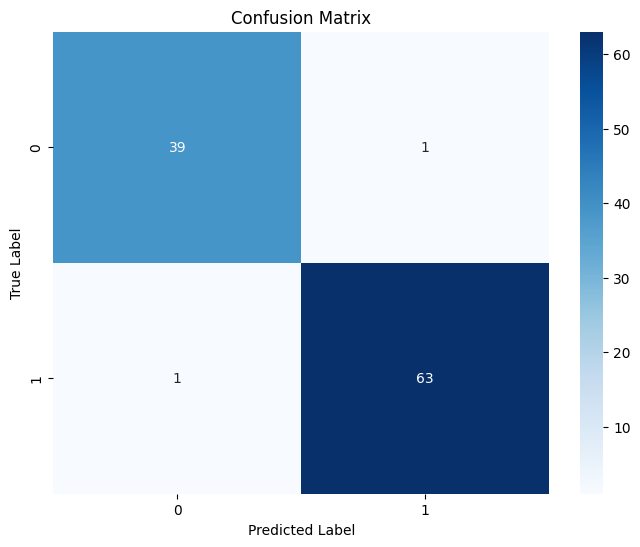

In [88]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix with title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.9807692307692307
Recall: 0.984375
Precision: 0.984375
F1 Score: 0.984375
Confusion Matrix:
 [[39  1]
 [ 1 63]]


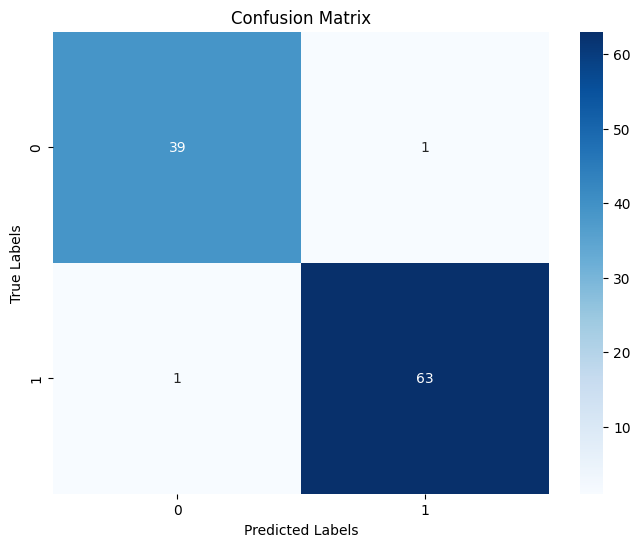

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example of evaluation parameters
# Assuming y_test and y_pred are defined

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# 3. Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# 4. F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 6. Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)




In [90]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree', 'Random Forest','Gradient Boosting', 'Diabetes Prediction Model'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train, random_train, gb_train, acc_lrd_soft ],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy, random_accuracy, gb_accuracy, acc_test_lrd_soft ],
                       'Model Recall':[svc_recall,knn_recall,log_recall,decision_recall,random_recall,gb_recall,recall_lrd_soft]})

models.style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Model,Training Accuracy,Model Accuracy,Model Recall
0,Support Vector Machines,61.540000,61.540000,100.000000
1,KNN,94.950000,89.420000,85.710000
2,Logistic Regression,92.310000,95.190000,93.750000
3,Decission Tree,100.000000,94.230000,93.750000
4,Random Forest,100.000000,95.190000,95.240000
5,Gradient Boosting,99.760000,94.230000,95.240000
6,Diabetes Prediction Model,100.000000,98.080000,98.440000


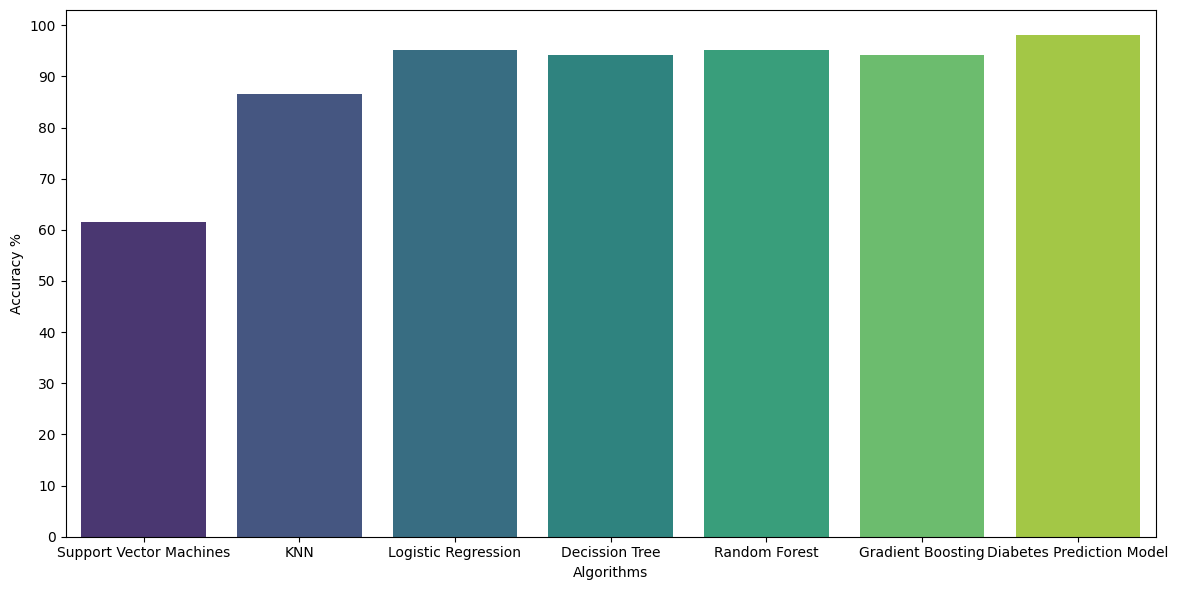

In [78]:
plt.figure(figsize=(12,6))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'],palette='viridis' )

plt.yticks(np.arange(0, max(models['Model Accuracy']) + 10, 10))  # Set y-ticks to show every 10 units.
plt.tight_layout()
plt.show()